# 01. Handling Irrelevant Data

**What Does Irrelevant Data Mean?**  
Irrelevant data refers to data that does not contribute to solving the specific problem or question being addressed. Including such data in analysis can lead to noise, misinterpretation, and reduced model performance.

**Examples of Irrelevant Data:**  
1. **Column-wise:**  
   - In a dataset analyzing employee performance, columns like "Employee ID" or "Home Address" may not be useful.  
2. **Row-wise:**  
   - If we are analyzing sales data for 2024, rows related to sales in 2023 would be irrelevant.

**What to Do With Irrelevant Data?**  
- **Drop Irrelevant Columns or Rows:** If the data is clearly irrelevant, it’s best to remove it to simplify the analysis.  
- **Consult Domain Experts:** A feature that seems irrelevant might still have contextual importance. Always verify before discarding.  
- **Use Statistical Tools:** Check correlation matrices or feature importance scores to identify features that are not contributing to the model.

**Techniques to Handle Irrelevant Data:**  
1. **Correlation Analysis:** Use a correlation matrix to identify features with very low or no correlation with the target variable.  
2. **Feature Selection Techniques:** Utilize methods like Recursive Feature Elimination (RFE), Lasso Regression, or tree-based feature importance to filter out irrelevant features.  
3. **Domain Knowledge:** Leverage expertise to determine whether a feature is genuinely unnecessary.

**Precautions to Take:**  
- Avoid dropping features prematurely; always validate their relevance first.  
- Perform exploratory data analysis (EDA) to understand the impact of features.  
- Be cautious with automated feature selection methods; combine them with domain knowledge for better accuracy.  

**By identifying and removing irrelevant data, we can improve the efficiency and accuracy of our models while simplifying the dataset.**

In [3]:
#  Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [4]:
# Dataset 01: 
#Load the dataset 
df= pd.read_csv("C:\\Users\\BINPAT\\Documents\\Python Self\\Feature Engineering\\Datasets\\train.csv") 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### We can see that "Ticket", "PassengerId" columns in the dataset seems like don't have to much impact on datasets. We can drop these irrelevant columns.

In [7]:
# 1. Dropping the 'Ticket' column (irrelevant data)
df.drop(columns=["Ticket", "PassengerId"], inplace=True)

In [8]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


# 02. Feature Creation

**Feature creation** refers to the process of generating new variables or columns from the existing data that may help to improve the predictive power of a model. This process involves deriving additional insights or characteristics from the current data, which could potentially improve the model's accuracy.

Feature creation techniques often include:

- **Combining multiple columns** into one new feature (e.g., combining `SibSp` and `Parch` to form `FamilySize`).
- **Converting continuous variables** into categorical variables (e.g., grouping ages into age ranges).
- **Extracting information from text or date columns** (e.g., extracting the month or day from a date).
- **Mathematical transformations** to create meaningful features (e.g., applying logarithms to skewed data to improve model performance).

### Example: Feature Creation from Titanic Dataset

Let’s consider a simple example using the Titanic dataset. We can create new features based on existing columns:

1. **FamilySize**: Combining `SibSp` (siblings/spouse aboard) and `Parch` (parents/children aboard) to create a new feature representing the size of the family.
2. **Age Group**: Creating age groups like `Child`, `Teen`, `Adult`, and `Elderly` based on the `Age` column.
3. **IsAlone**: Creating a binary column to check if a passenger was alone (i.e., `FamilySize == 1`).

Feature creation is an essential step in the data preprocessing process, as it can add valuable information that the model may use to improve its predictions. In the Titanic dataset example, we created `FamilySize`, `AgeGroup`, and `IsAlone`, which might be more predictive of survival than the raw columns alone.

In [11]:
# Feature 1: FamilySize (combining SibSp and Parch)
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

In [12]:
# Feature 2: AgeGroup (categorizing passengers into age groups)
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 60, 100], labels=['Child', 'Teen', 'Adult', 'Elderly'])

In [13]:
df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,AgeGroup
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,2,Adult
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,2,Adult


In [14]:
# Checking Name 
df['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [15]:
# Feature 4,5,6: Based on Full Name
# Extract last name
df["LastName"] = df["Name"].apply(lambda x: x.split(",")[0].strip())

# Extract initials/title
df["Title"] = df["Name"].str.extract(r',\s*([^\.]+)\.')

# Extract first name
df["FirstName"] = df["Name"].apply(lambda x: x.split(",")[1].split()[1].strip() if len(x.split(",")[1].split()) > 1 else "")

In [16]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,AgeGroup,LastName,Title,FirstName
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,2,Adult,Braund,Mr,Owen
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,2,Adult,Cumings,Mrs,John
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,1,Adult,Heikkinen,Miss,Laina
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,2,Adult,Futrelle,Mrs,Jacques
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,1,Adult,Allen,Mr,William


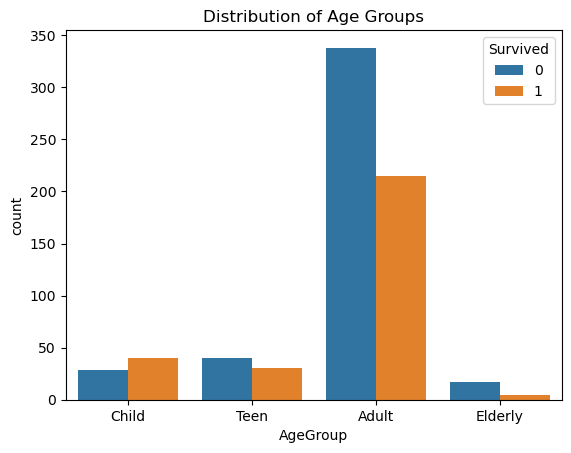

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting countplot for AgeGroup
sns.countplot(x='AgeGroup', data=df, hue='Survived')

# Display the plot
plt.title('Distribution of Age Groups')
plt.show()

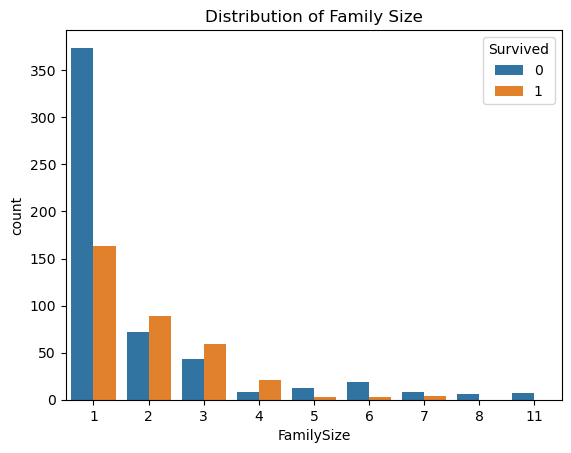

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting countplot for AgeGroup
sns.countplot(x='FamilySize', data=df, hue='Survived')

# Display the plot
plt.title('Distribution of Family Size')
plt.show()

**See it is much easier to visualize the data and make a conclusion.**

# 03. Handling Date/Time Values

When working with date-time values, it's important to first ensure that they are in the correct format. Sometimes, date-time information may be stored as strings (object type), and you need to convert them into actual datetime objects for proper handling and analysis.

#### 1. **Convert Object Type to Datetime**:
   If the column is in `object` type but actually contains date or time information, you need to convert it to the appropriate `datetime` type. The `pd.to_datetime()` function automatically converts a string (or any other format) to a `datetime` object. The `errors='coerce'` argument will turn any invalid date format into `NaT` (Not a Time), helping to avoid issues.

#### 2. **Extract Date Components**:
   Once your column is properly converted to `datetime`, you can extract individual components like the year, month, day, weekday, etc.

#### 3. **Handling Missing Date Values**:
   After converting the `Date` column, you might have some missing or incorrect date values (`NaT`). You need to handle them before proceeding with analysis.

#### 4. **Handling Time Data**:
   If your dataset contains time information (such as `HH:MM:SS`), you can extract components like the hour, minute, and second.

By converting and extracting date-time components, you can derive useful insights and better handle time-related features. This process is vital for feature engineering in time series analysis, sales prediction, event forecasting, or any scenario involving time-sensitive data.

In [22]:
df= pd.read_csv("C:\\Users\\BINPAT\\Documents\\Python Self\\Feature Engineering\\Datasets\\orders.csv")
df.head(2)

,date,product_id,city_id,orders
0,2019-12-10,5628,25,3
1,2018-08-15,3646,14,157


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        1000 non-null   object
 1   product_id  1000 non-null   int64 
 2   city_id     1000 non-null   int64 
 3   orders      1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


In [24]:
# Data Type Chaning
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.head(2)

,date,product_id,city_id,orders
0,2019-12-10,5628,25,3
1,2018-08-15,3646,14,157


In [25]:
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day
df['Weekday'] = df['date'].dt.weekday  # Returns 0-6 (Mon-Sun)
df['Weekend'] = df['date'].dt.weekday >= 5  # True if Saturday (5) or Sunday (6)

In [26]:
df.head()

,date,product_id,city_id,orders,Year,Month,Day,Weekday,Weekend
0,2019-12-10,5628,25,3,2019,12,10,1,False
1,2018-08-15,3646,14,157,2018,8,15,2,False
2,2018-10-23,1859,25,1,2018,10,23,1,False
3,2019-08-17,7292,25,1,2019,8,17,5,True
4,2019-01-06,4344,25,3,2019,1,6,6,True


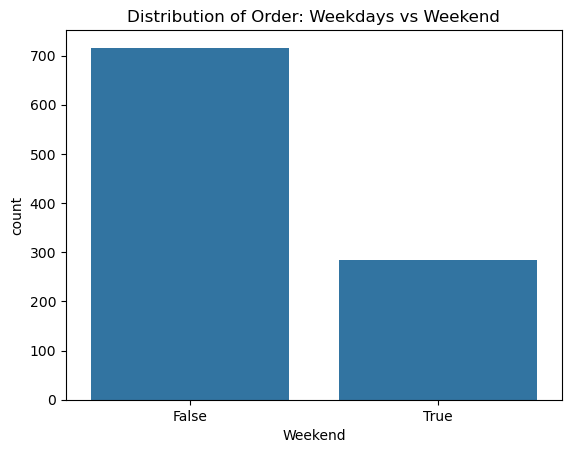

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting countplot for AgeGroup
sns.countplot(x='Weekend', data=df)

# Display the plot
plt.title('Distribution of Order: Weekdays vs Weekend')
plt.show()

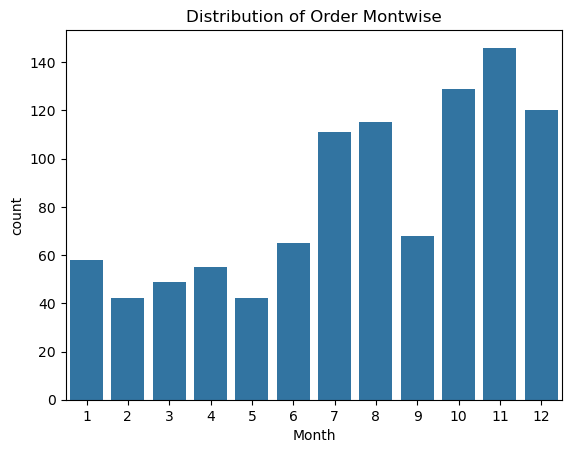

In [28]:
sns.countplot(data=df, x='Month')
# Display the plot
plt.title('Distribution of Order Montwise')
plt.show()

# 04. Handling Mixed Variables

Mixed variables refer to data that contains both categorical and numerical components within the same column, which can pose challenges for analysis. One common scenario is when a column includes both a numeric value and a symbol or text, such as a price column that includes currency symbols.

#### Example:
Consider a dataset with an `OrderAmount` column containing values like:

- "$120.50"
- "€250.75"
- "₹99.99"

In this case, the numeric value (e.g., `120.50`, `250.75`) is mixed with a currency symbol (e.g., `$`, `€`, `₹`), creating a mixed variable.

#### Steps to Handle Mixed Variables:
1. **Identify the Mixed Variable**: The first step is to identify which columns contain mixed variables. These variables typically have data types like `object` or `string` that contain both text and numbers.
  
2. **Extract Useful Information**: For columns that combine text and numbers, you can use regular expressions or string operations to separate the numeric value from the categorical part. For example, you can extract the currency symbol and the numeric value into separate columns.

   - The `Currency` column can store the currency symbols (e.g., `$`, `€`, `₹`).
   - The `Amount` column can store just the numeric values (e.g., `120.50`, `250.75`, `99.99`).

3. **Convert to Usable Format**: After extracting the numeric data, it is important to convert it into a usable format, such as float or integer, for analysis.

#### Why Handle Mixed Variables?
- **Data Cleaning**: Mixed variables can cause errors or inconsistencies during data analysis or machine learning model training. For example, algorithms may treat the symbols as part of the number, leading to incorrect results.
- **Feature Engineering**: Splitting the mixed variables into separate columns can provide new insights. For example, extracting the currency symbol might allow you to analyze data by different currencies.
- **Improved Analysis**: By converting mixed variables into pure numerical values, you enable more efficient and effective analysis.

#### Precautions:
- **Check for missing or unusual values**: After splitting mixed variables, ensure that the new columns (e.g., numeric values or categories) don’t contain any unexpected or missing values.
- **Consistency**: Ensure that the extraction or conversion logic is consistent across all rows to avoid discrepancies in the cleaned data.

Handling mixed variables is an essential part of data preprocessing. By extracting the relevant numeric or categorical components, we can make the data more suitable for analysis and ensure it is ready for further processing or modeling.

In [60]:
# Create a sample dataset with 20 rows and mixed variables in the 'Price' column
data = {'OrderID': np.arange(1, 21),
        'Price': ['$120.50', '€250.75', '₹99.99', '£450.20', '$180.45', '€75.60', '₹110.99', '£330.10', 
                  '$220.55', '€300.80', '₹150.20', '£500.00', '$90.99', '€180.25', '₹220.30', '£60.10', 
                  '$400.75', '€500.60', '₹210.80', '£100.25']}

df = pd.DataFrame(data)

In [62]:
df.head(5)

,OrderID,Price
0,1,$120.50
1,2,€250.75
2,3,₹99.99
3,4,£450.20
4,5,$180.45


In [64]:
# Clean the 'Price' column by removing the currency symbols and converting it to numeric
df['Currency'] = df['Price'].str.extract('([^\d\.,]+)', expand=False)  # Extract currency symbol
df['PriceValue'] = df['Price'].str.replace('[^\d\.,]', '', regex=True).astype(float)  # Clean and convert to numeric

# Show the cleaned dataset
print("Cleaned DataFrame with numeric 'Price' values:")
df.head()

Cleaned DataFrame with numeric 'Price' values:


,OrderID,Price,Currency,PriceValue
0,1,$120.50,$,120.50
1,2,€250.75,€,250.75
2,3,₹99.99,₹,99.99
3,4,£450.20,£,450.20
4,5,$180.45,$,180.45


In [68]:
print(df['PriceValue'].sum())

4554.17


**You can concver £,€ or ₹ to $ format to maintain Data Intrigity.**